## Oppstart

In [2]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [3]:
from module_update import update, css

In [4]:
css()

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Note that the file `nbtext.py` will be overwritten in the code below

This is probably ok, though. If not, change `update('nbtext', overwrite = True)` to `update('nbtext', overwrite = False)` and the file will stay unchanged. 


In [7]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite = True)
update('token_map', overwrite = True)
import nbtext as nb
import token_map as tm
from nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import graph_networkx_louvain as gnl
import pandas as pd
%matplotlib inline

plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)


Updated file `C:\Users\larsj\Documents\GitHub\NER\graph_networkx_louvain.py`

Updated file `C:\Users\larsj\Documents\GitHub\NER\nbtext.py`

Updated file `C:\Users\larsj\Documents\GitHub\NER\token_map.py`

## Navn i bøker


Vi søker etter navn i en bok, og en serie av bøker.

Kommandoene er:
1. `names` henter et sett med forslag til navn, fra nbtext
1. `show_names` gir en oversikt over funnene, fra token_map
1. `names_to_token_map_file` lagrer navneforslagene til en excelfil (eller csv) for redigering (token_map)
1. `read_token_map_file` henter redigert fil tilbake for analyse (token_map)
1. `character_network` lager graf for navnene (token_map)
1. `show_graph`  tegner grafen (fra graph_networkx_louvain)
1. `show_communities` viser clustre i grafen (graph_networkx_louvain)


# Eksempel

I eksemplet ser vi først på en tilfeldig bok, deretter mulighetene for å gjøre det samme med et helt korpus.

## Korpus

Bygg først et korpus, enten fra `

In [8]:
korpus = nb.book_corpus(author='hamsun%')

In [7]:
#korpus = nb.restore_metadata_from_excel('metadatafil.xls')

## Sjekk innholdet

Gjør noen søk for å se at alt er ok. Konkordanser er fine til det. Her går urnene gjennom `nb.pure_urn` -  i fremtiden skal det ikke være nødvendig.

In [9]:
nb.urn_concordance(word = 'arbeid', urns = nb.pure_urn(korpus))

"Paa turne, Hamsun, Knut, 1960",Amerika . Under hardt kroppslig,arbeid,for livets opphold hadde tanken
"Knut Hamsuns brev, Hamsun, Knut, 1994",", senere kjent for sitt",arbeid,for vergerådene . I årene
"Knut Hamsuns brev, Hamsun, Knut, 1994",» Peter Nansen skaffet Krohg,arbeid,med å tegne og intervjue
"Knut Hamsuns brev, Hamsun, Knut, 1994",894 å sette i gang,arbeid,på strekningen Voss-Taugevatn .
"Knut Hamsuns brev, Hamsun, Knut, 1994",nervekraft nok fra sitt litterære,arbeid,. » ( MINNER I
"Knut Hamsuns brev, Hamsun, Knut, 1994",", var Hamsun i fullt",arbeid,"med Ved Rigets Port ,"


## Navn

Finn forslag til navn med `names`. Se på dem med `show_names`. Her er det muligheter til å skru litt på parametrene. Hvis ratioen skrus ned fjernes en del ord, og om cutoff settes høyere vil også enkelte navneforslag kunne forsvinne.

In [10]:
korpus['urn'][0]

2007021401006

In [19]:
BOOK = nb.pure_urn(korpus['urn'])[1]

In [20]:
navn = nb.names(BOOK, ratio=0.5, cutoff=10)
tm.show_names(navn)

Lag 1

    Nagel - 355
    Minutan - 138
    Gud - 120
    Dagny - 71
    Ipér - 63
    Kielland - 61
    Stenersen - 39
    Marta - 38
    Sara - 36
    Mortu - 34
    Andresen - 33
    Gude - 32
    Gladstone - 31
    Drottinn - 30
    Guds - 27
    Nagels - 26
    Tolstoj - 24
    Grøgaard - 22
    Karlsen - 21
    Ola - 21
    Øien - 21
    Ipvi - 20
    Hansen - 19
    Minutuna - 19
    Dagnyju - 18
    Minutunni - 18
    Ipå - 17
    Reinert - 17
    Jrvi - 14
    Dagnyjar - 13
    Ipess - 13
    Johannes - 13
    Bjørnson - 12
    Gudi - 12
    Simonsen - 12
    Kamma - 11
    Kristjaniu - 11

Lag 2

    Mortu Gude - 9
    Dagny Kielland - 8
    Marta Gude - 7
    Dagnyjar Kielland - 4
    Dagnyju Kielland - 2
    Minutan Johannes - 1

Lag 3


Lag 4




Listen trenger litt redigering, og sammenslåing.

In [21]:
tm.names_to_token_map_file(navn, filename="en_bok12.xls")

True

### Redigeringsaktivitet

Rediger filen fra cellen med lagringskommando (`names_to_token_map_file(....)`)
Åpne i for eksempel i excel eller tilsvarende som for eksempel openoffice eller libreoffice. Etter redigering, kjøres cellen under. Husk bare å benytte riktig filnavn. 

In [22]:
redigerte_navn = tm.read_token_map_file("en_bok12.xls")

Listen med redigerte navn går inn i grafen - vi tar med oss variabelen BOOK defineret over sammen listen:

In [23]:
G = tm.character_network(BOOK, redigerte_navn)

Dernest kan den vises og analyseres med passende kommandoer

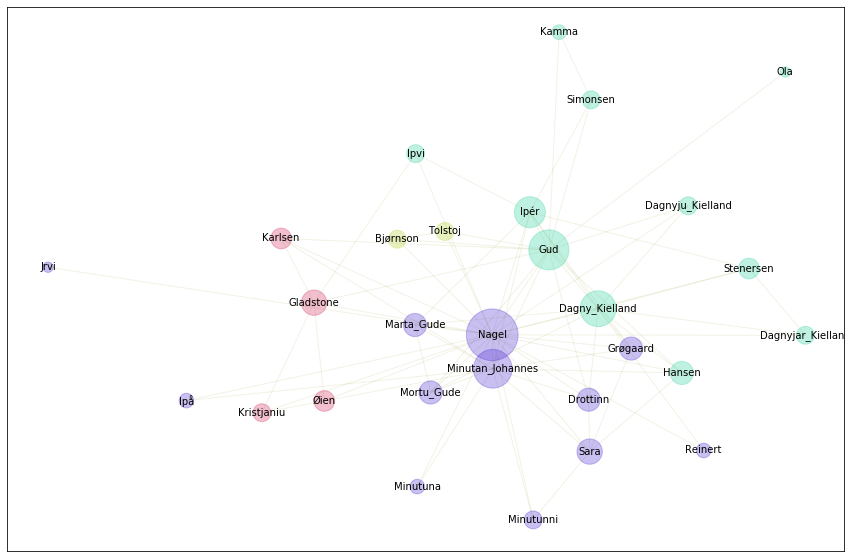

In [24]:
gnl.show_graph(G)

In [25]:
gnl.show_communities(G)

Tolstoj-Bjørnson :  Tolstoj, Bjørnson

Gud-Dagny_Kielland :  Gud, Dagny_Kielland, Ipér, Hansen, Stenersen, Dagnyjar_Kielland, Ipvi, Simonsen, Dagnyju_Kielland, Kamma, Ola

Nagel-Minutan_Johannes :  Nagel, Minutan_Johannes, Sara, Grøgaard, Drottinn, Mortu_Gude, Marta_Gude, Karlsen, Minutunni, Reinert, Ipå, Minutuna, Jrvi

Gladstone-Øien :  Gladstone, Øien, Kristjaniu

